In [1]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
# Ridge, Lasso, ElasticNet 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tress
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz
# MSE 계산
from sklearn.metrics import mean_squared_error
# MAE 계산
from sklearn.metrics import mean_absolute_error
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Scale 변환: 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA
# 날짜 데이터 생성
from datetime import datetime
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima_model import ARIMA

# jupyter notebook 사용 시 그래프 자동 출력 옵션
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

# 음수 표시
plt.rc('axes', unicode_minus=False)
# 맑은 고딕 적용
plt.rc("font", family="Malgun Gothic")

# 주성분 분석
데이터 표준화 이후, 주성분 분석을 실시하여 2차원(1 vs 2 주성분, 1 vs 3 주성분, ...) 산점도를 그려라. (목표변수로 색 구분) + 주성분 naming
- 데이터: 유방암.CSV(변수: 31개, 자료 수: 320개)
- 목표변수(diagnosis: 양성(108개), 음성(benign, 212개)

## 1. 데이터 구성

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine="python" 지정
df_raw=pd.read_csv("../data/유방암.csv", engine="python")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
# 데이터 분리(Y, Xs) -> 설명변수를 이용한 주성분 분석
df_raw_x=df_raw.drop("diagnosis", axis=1)
df_raw_y=df_raw["diagnosis"]
display(df_raw_y.head())
display(df_raw_x.head())

0    음성
1    양성
2    음성
3    양성
4    양성
Name: diagnosis, dtype: object

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


## 2. 데이터 확인 및 Scaling

In [4]:
# 요약 통계량 -> Scale 변환 필요 확인
df_raw_x.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


In [5]:
# 변수 이름 저장
x_cols=df_raw_x.columns
# Scale 변환: ndarray 형식
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)
# 변환된 데이터 및 형태 확인
print("Scaled Data: \n {}".format(nd_scaled[:5].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

Scaled Data: 
 [[-0.158 -0.879 -0.166 -0.233 -0.745 -0.479 -0.551 -0.628 -0.997 -0.393
  -0.693 -1.741 -0.65  -0.516 -0.499 -0.513 -0.671 -0.865 -0.592 -0.457
  -0.149 -1.156 -0.154 -0.225  0.491  0.139 -0.094 -0.302  0.526  0.511]
 [-1.313 -2.561 -1.329 -1.15  -0.24  -1.154 -1.143 -1.2   -1.774  0.184
  -0.995 -1.649 -1.003 -0.784  0.325 -1.023 -1.067 -1.361 -0.892 -0.801
  -1.342 -2.517 -1.38  -1.124  0.254 -1.046 -1.159 -1.48  -1.388 -0.507]
 [ 0.695 -0.421  0.603  0.596 -0.947 -0.675 -0.478 -0.212 -0.899 -1.174
  -0.734 -1.505 -0.715 -0.471 -1.419 -1.058 -0.936 -1.127 -1.099 -1.269
   0.535 -0.143  0.445  0.432 -0.613 -0.367  0.004  0.173  0.224 -0.887]
 [-0.211 -1.301 -0.256 -0.309 -1.292 -0.661 -0.788 -0.834 -0.659 -0.834
  -0.774 -1.593 -0.712 -0.572 -1.276 -0.594 -0.557 -0.841 -1.011 -0.684
  -0.263 -1.491 -0.313 -0.354 -1.339 -0.169 -0.177 -0.458 -0.524 -0.221]
 [-0.754 -1.738 -0.82  -0.746 -2.095 -1.505 -1.175 -1.326 -1.934 -0.957
  -1.055 -1.518 -1.008 -0.763 -0.761 -0.826 -

In [6]:
# DataFrame으로 저장
df_scaled=pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.158,-0.879,-0.166,-0.233,-0.745,-0.479,-0.551,-0.628,-0.997,-0.393,...,-0.149,-1.156,-0.154,-0.225,0.491,0.139,-0.094,-0.302,0.526,0.511
1,-1.313,-2.561,-1.329,-1.150,-0.240,-1.154,-1.143,-1.200,-1.774,0.184,...,-1.342,-2.517,-1.380,-1.124,0.254,-1.046,-1.159,-1.480,-1.388,-0.507
2,0.695,-0.421,0.603,0.596,-0.947,-0.675,-0.478,-0.212,-0.899,-1.174,...,0.535,-0.143,0.445,0.432,-0.613,-0.367,0.004,0.173,0.224,-0.887
3,-0.211,-1.301,-0.256,-0.309,-1.292,-0.661,-0.788,-0.834,-0.659,-0.834,...,-0.263,-1.491,-0.313,-0.354,-1.339,-0.169,-0.177,-0.458,-0.524,-0.221
4,-0.754,-1.738,-0.820,-0.746,-2.095,-1.505,-1.175,-1.326,-1.934,-0.957,...,-0.951,-1.935,-0.998,-0.870,-1.784,-1.109,-1.094,-1.367,-1.071,-0.898


In [7]:
# Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,...,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-2.144,-2.561,-2.137,-1.629,-3.284,-1.690,-1.442,-1.607,-2.164,-1.772,...,-1.906,-2.517,-1.914,-1.422,-2.234,-1.477,-1.648,-2.165,-2.146,-1.602
25%,-0.711,-0.691,-0.706,-0.725,-0.641,-0.737,-0.819,-0.899,-0.724,-0.728,...,-0.751,-0.654,-0.771,-0.750,-0.645,-0.734,-0.794,-0.813,-0.670,-0.683
50%,-0.156,-0.026,-0.114,-0.242,-0.055,-0.139,-0.133,-0.041,-0.077,-0.172,...,-0.157,-0.057,-0.122,-0.257,0.016,-0.182,-0.062,0.107,-0.134,-0.225
75%,0.751,0.525,0.717,0.684,0.611,0.567,0.560,0.595,0.580,0.561,...,0.749,0.614,0.714,0.633,0.581,0.554,0.611,0.768,0.332,0.528
max,3.316,4.574,3.313,4.327,4.501,3.889,3.597,3.221,4.272,4.842,...,3.382,3.694,3.564,4.876,3.648,4.283,3.816,2.166,5.179,6.004


## 3. 주성분 분석

In [8]:
n=len(df_raw_x.columns)
# 주성분 분석: 주성분1(Prin1)~ 생성 및 저장
pca=PCA(n_components=n)
nd_pca=pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print("PCA Data :\n{}".format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape: \n {}".format(nd_pca.shape))

PCA Data :
[[-2.00389702e+00 -2.58058106e-01 -1.84890296e+00 -1.31467512e+00
   6.24726217e-01  7.89451676e-01  1.32108678e-01 -1.01407999e+00
   4.97472568e-01 -5.11154359e-01 -1.59476526e-01 -3.85870988e-04
  -1.78211309e-02 -6.72126362e-02  1.47199795e-01 -7.13592324e-02
  -1.35801647e-01  1.60993793e-01 -4.78160362e-01 -2.37147886e-01
   2.44216713e-01  1.64854061e-01  6.63767950e-02  1.80669748e-01
  -1.14558313e-03  8.63622562e-03 -6.86072623e-02  6.04830294e-04
   2.58020639e-02  1.41585915e-02]
 [-5.84906746e+00  2.11647637e-01 -1.68087360e-01 -2.95641861e+00
   1.83054388e+00 -4.05165090e-01  3.23010727e-01 -5.26610206e-01
   4.11091221e-01  1.33667857e-01 -6.39117982e-01 -1.75471721e-01
  -2.09690997e-01 -9.71313041e-02 -2.06895790e-01  1.35980861e-01
  -1.49034285e-01  9.55093848e-02 -1.27211295e-01 -1.48419478e-01
   1.08089523e-01  1.68014456e-01 -6.48893521e-02 -4.34769760e-02
   1.49143900e-02 -4.33905539e-02 -4.97770561e-02  1.20852801e-02
   1.49415519e-02  3.80181172e

In [9]:
# 주성분 점수 저장(Prin1~Prin30, DataFrame형식) 및 확인
df_pca=pd.DataFrame(nd_pca, columns=["Prin"+str(i) for i in range(1, n+1)])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,0.244217,0.164854,0.066377,0.180670,-0.001146,0.008636,-0.068607,0.000605,0.025802,0.014159
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,0.108090,0.168014,-0.064889,-0.043477,0.014914,-0.043391,-0.049777,0.012085,0.014942,0.003802
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,-0.034971,-0.296615,-0.089094,-0.111252,-0.078950,-0.050892,0.067030,0.030987,0.012601,-0.003082
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.009942,-0.103717,0.066354,0.105339,-0.013316,-0.011097,-0.021080,0.033756,-0.021498,0.005064
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,0.072100,0.129423,-0.003367,0.020147,-0.045760,0.052844,-0.065091,0.017130,0.021292,-0.001706


In [10]:
# 주성분 분석 통계량 저장:주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat=pd.DataFrame()
df_pca_stat["PrinNo"]=[l for l in range(1, n+1)]
df_pca_stat["EigenValues"]=pca.explained_variance_
df_pca_stat["EigenValueRatio"]=pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3).head(7)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.125,0.436,0.436
1,2,5.982,0.199,0.635
2,3,3.116,0.104,0.738
3,4,1.950,0.065,0.803
4,5,1.319,0.044,0.847
5,6,1.252,0.042,0.889
6,7,0.749,0.025,0.914


> 적정 주성분 선택  
> : 상관계수 기준(고유값>1) 5개  
> : 공분산 기준(고유값 누적비율>0.8) 3개  

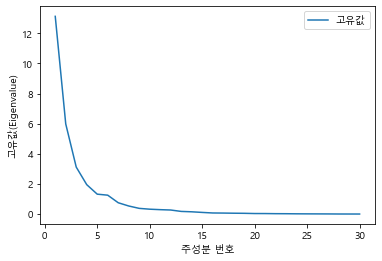

In [11]:
# Scree Plot
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")
# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

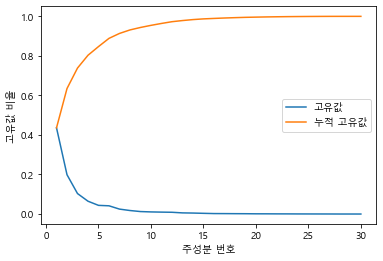

In [12]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label="고유값")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

#### >> 위 데이터들을 근거로 주성분 개수를 5개로 결정

In [13]:
# 주성분 분석: 주성분1(Prin1)~ 주성분5(Prin5) 생성 및 저장
pca=PCA(n_components=5)
nd_pca=pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print("PCA Data :\n{}".format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape: \n {}".format(nd_pca.shape))

PCA Data :
[[-2.00389702 -0.25805811 -1.84890296 -1.31467512  0.62472622]
 [-5.84906746  0.21164764 -0.16808736 -2.95641861  1.83054388]
 [-1.54904826 -2.92566391 -2.44246291 -0.46586769  0.09042314]
 [-3.11249085 -1.32153438 -1.21958526 -1.44380449  0.69955798]
 [-5.82479946 -1.67892363  0.05729344 -1.50169681  0.84564816]]
Shape: 
 (320, 5)


In [14]:
# 주성분 점수 저장(Prin1~Prin30, DataFrame형식) 및 확인
df_pca=pd.DataFrame(nd_pca, columns=["Prin"+str(i) for i in range(1, 6)])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,Prin1,Prin2,Prin3,Prin4,Prin5
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,0.139396,-0.094470,-0.301949,0.525611,0.511081,-2.003897,-0.258058,-1.848903,-1.314675,0.624726
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149,-5.849067,0.211648,-0.168087,-2.956419,1.830544
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,-0.367031,0.004076,0.172850,0.223844,-0.886803,-1.549048,-2.925664,-2.442463,-0.465868,0.090423
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788,-3.112491,-1.321534,-1.219585,-1.443804,0.699558
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278,-5.824799,-1.678924,0.057293,-1.501697,0.845648


In [15]:
# 주성분 분석 데이터의 변수 이름
x_cols=pd.DataFrame({"Feature":df_raw_x.columns})
# 주성분 Prin1~5까지의 고유벡터 저장
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치, 부호 변경)
df_eigenvector=pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                                              columns=["Prin"+str(i) for i in range(1, 6)])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5
0,mean_radius,-0.214,0.238,0.026,0.026,-0.007
1,mean_texture,-0.110,0.046,0.038,-0.604,0.042
2,mean_perimeter,-0.225,0.218,0.024,0.029,-0.010
3,mean_area,-0.213,0.245,-0.002,0.040,-0.010
4,mean_smoothness,-0.151,-0.194,0.058,0.201,-0.037
5,mean_compactness,-0.240,-0.163,0.046,0.053,-0.024
6,mean_concavity,-0.261,-0.046,0.003,0.046,-0.060
7,mean_concave_points,-0.260,0.039,0.035,0.086,-0.008
8,mean_symmetry,-0.147,-0.197,0.047,0.138,0.428
9,mean_fractal_dimension,-0.076,-0.351,-0.000,0.080,-0.056


In [16]:
# 목표변수 추가
df_pca["diagnosis"]=df_raw_y
df_pca

,Prin1,Prin2,Prin3,Prin4,Prin5,diagnosis
0,-2.003897,-0.258058,-1.848903,-1.314675,0.624726,음성
1,-5.849067,0.211648,-0.168087,-2.956419,1.830544,양성
2,-1.549048,-2.925664,-2.442463,-0.465868,0.090423,음성
3,-3.112491,-1.321534,-1.219585,-1.443804,0.699558,양성
4,-5.824799,-1.678924,0.057293,-1.501697,0.845648,양성
...,...,...,...,...,...,...
315,3.203038,-0.265636,4.051026,1.690832,0.115799,음성
316,3.421096,0.860183,2.742605,2.127877,0.422649,음성
317,11.009894,1.856835,6.817009,-1.306914,-0.595707,음성
318,6.626788,2.463363,5.945138,1.983595,-1.872139,음성


## 주성분 분석 후, 각 주성분 간의 산점도

<AxesSubplot:xlabel='Prin4', ylabel='Prin5'>

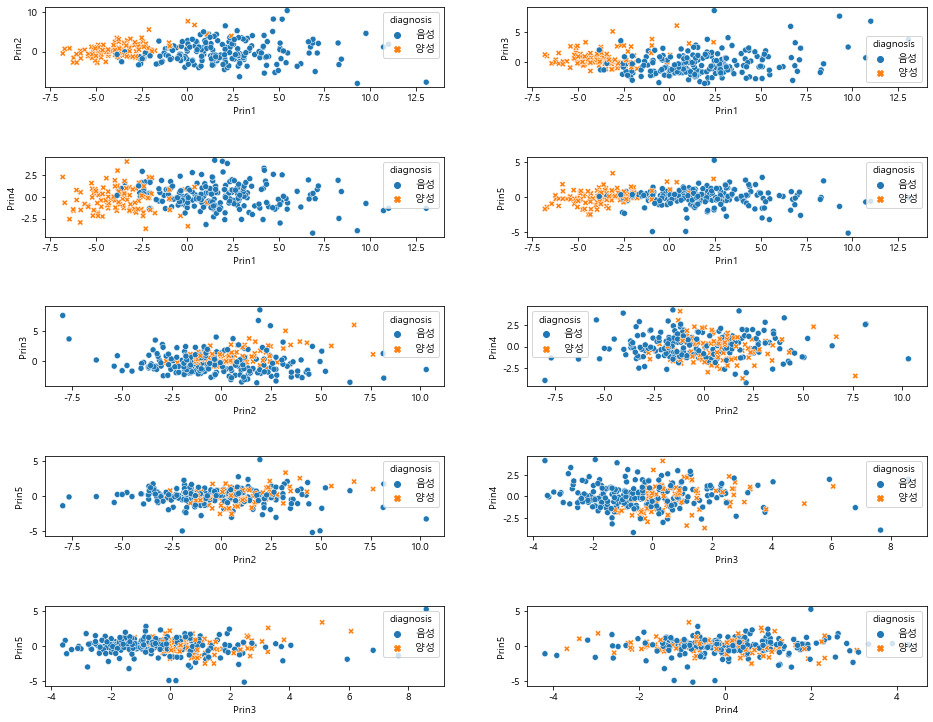

In [17]:
# 산점도 그리기
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))=plt.subplots(nrows=5, ncols=2, figsize=(13,10))
plt.tight_layout(w_pad=5, h_pad=5)

sns.scatterplot("Prin1", "Prin2", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax1)
sns.scatterplot("Prin1", "Prin3", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax2)
sns.scatterplot("Prin1", "Prin4", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax3)
sns.scatterplot("Prin1", "Prin5", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax4)
sns.scatterplot("Prin2", "Prin3", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax5)
sns.scatterplot("Prin2", "Prin4", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax6)
sns.scatterplot("Prin2", "Prin5", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax7)
sns.scatterplot("Prin3", "Prin4", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax8)
sns.scatterplot("Prin3", "Prin5", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax9)
sns.scatterplot("Prin4", "Prin5", hue="diagnosis", style="diagnosis", data=df_pca, ax=ax10)

> 전체적으로 선형성을 띄고 있다.